In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/train.csv
data/test.csv


In [ ]:
pd.set_option('display.max_rows', None)

pd.set_option('display.max_colwidth', None)

" pd.set_option('display.max_rows', None)\n\npd.set_option('display.max_colwidth', None) "

In [4]:
training = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['SalePrice'] = np.nan
all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

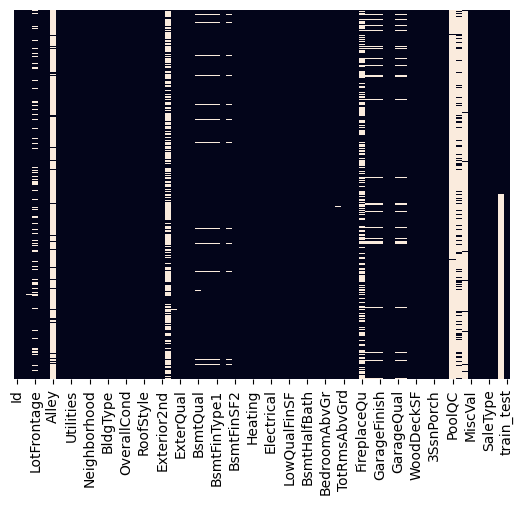

In [5]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

In [6]:
def df_summary(all_data):
    summary_data = []

    for col in all_data.columns:
        col_dtype = all_data[col].dtype
        num_of_nulls = all_data[col].isnull().sum()
        num_of_non_null = all_data[col].notnull().sum()
        num_of_distinct_values = all_data[col].nunique()
        percentage_of_nulls = (num_of_nulls/all_data.shape[0]) * 100
        percentage_of_nulls = f'{round(percentage_of_nulls, 4)}%'

        if num_of_distinct_values <= 10:
            distinct_values_counts = all_data[col].value_counts().to_dict()
        else:
            top_10_values_counts =all_data[col].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key = lambda item: item[1], reverse = True)}


        summary_data.append({
            'col_name': col,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_null': num_of_non_null,
            'percentage_of_nulls':  percentage_of_nulls,
            'distinct_values_counts': distinct_values_counts
        })
        
    summary_data = pd.DataFrame(summary_data)
    return summary_data

In [7]:
summary_df = df_summary(all_data)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_null,percentage_of_nulls,distinct_values_counts
0,Id,int64,0,2919,0.0%,"{2919: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, ..."
1,MSSubClass,int64,0,2919,0.0%,"{20: 1079, 60: 575, 50: 287, 120: 182, 30: 139..."
2,MSZoning,object,4,2915,0.137%,"{'RL': 2265, 'RM': 460, 'FV': 139, 'RH': 26, '..."
3,LotFrontage,float64,486,2433,16.6495%,"{60.0: 276, 80.0: 137, 70.0: 133, 50.0: 117, 7..."
4,LotArea,int64,0,2919,0.0%,"{9600: 44, 7200: 43, 6000: 34, 9000: 29, 10800..."
...,...,...,...,...,...,...
77,YrSold,int64,0,2919,0.0%,"{2007: 692, 2009: 647, 2008: 622, 2006: 619, 2..."
78,SaleType,object,1,2918,0.0343%,"{'WD': 2525, 'New': 239, 'COD': 87, 'ConLD': 2..."
79,SaleCondition,object,0,2919,0.0%,"{'Normal': 2402, 'Partial': 245, 'Abnorml': 19..."
80,SalePrice,float64,1459,1460,49.9829%,"{140000.0: 20, 135000.0: 17, 145000.0: 14, 155..."


In [8]:
all_data['MSSubClass'].value_counts()

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

In [9]:
all_data.shape

(2919, 82)

In [10]:
all_data = all_data.drop(['Id', 'Street', 'Alley', 'Utilities', 'PoolQC', 'Fence', 'MiscFeature', '3SsnPorch', 'PoolArea', 'MiscVal', 'RoofMatl', 'Condition2'], axis=1)

In [11]:
all_data.LotFrontage = all_data.LotFrontage.fillna(training.LotFrontage.mean())
all_data.MasVnrArea = all_data.MasVnrArea.fillna(training.MasVnrArea.mean())
all_data.BsmtFinSF1 = all_data.BsmtFinSF1.fillna(training.BsmtFinSF1.mean())
all_data.GarageCars = all_data.GarageCars.fillna(training.GarageCars.mean())
all_data.BsmtHalfBath = all_data.BsmtHalfBath.fillna(training.BsmtHalfBath.mean())
all_data.BsmtFullBath = all_data.BsmtFullBath.fillna(training.BsmtFullBath.mean())
all_data.GarageCars = all_data.GarageCars.fillna(training.GarageCars.mean())
all_data.BsmtFinSF1 = all_data.BsmtFinSF1.fillna(training.BsmtFinSF1.mean())
all_data.BsmtFinSF2 = all_data.BsmtFinSF2.fillna(training.BsmtFinSF2.mean())
all_data.BsmtUnfSF = all_data.BsmtUnfSF.fillna(training.BsmtUnfSF.mean())
all_data.TotalBsmtSF = all_data.TotalBsmtSF.fillna(training.TotalBsmtSF.mean())
all_data.GarageArea = all_data.GarageArea.fillna(training.GarageArea.mean())
all_data.GarageYrBlt = all_data.GarageYrBlt.fillna(training.GarageYrBlt.mean())

In [12]:
all_data.dropna(subset=['MSZoning'])
all_data.dropna(subset=['Exterior1st'])
all_data.dropna(subset=['Exterior2nd'])
all_data.dropna(subset=['BsmtQual'])
all_data.dropna(subset=['BsmtCond'])
all_data.dropna(subset=['BsmtExposure'])
all_data.dropna(subset=['BsmtFinType1'])
all_data.dropna(subset=['BsmtFinType2'])
all_data.dropna(subset=['Electrical'])
all_data.dropna(subset=['KitchenQual'])
all_data.dropna(subset=['Functional'])
all_data.dropna(subset=['FireplaceQu'])
all_data.dropna(subset=['GarageType'])
all_data.dropna(subset=['GarageFinish'])
all_data.dropna(subset=['GarageQual'])
all_data.dropna(subset=['GarageCond'])
all_data.dropna(subset=['SaleType'])
all_data.dropna(subset=['MasVnrType'])

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,60,RL,65.000000,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,2,2008,WD,Normal,208500.0,1
2,60,RL,68.000000,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,9,2008,WD,Normal,223500.0,1
4,60,RL,84.000000,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,12,2008,WD,Normal,250000.0,1
6,20,RL,75.000000,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,255,57,0,0,8,2007,WD,Normal,307000.0,1
7,60,RL,70.049958,10382,IR1,Lvl,Corner,Gtl,NWAmes,PosN,...,235,204,228,0,11,2009,WD,Normal,200000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,20,RL,95.000000,13618,Reg,Lvl,Corner,Gtl,Timber,Norm,...,172,38,0,0,11,2006,New,Partial,NaN,0
1443,20,RL,88.000000,11577,Reg,Lvl,Inside,Gtl,Timber,Norm,...,161,225,0,0,9,2006,New,Partial,NaN,0
1445,90,RM,78.000000,7020,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,48,0,0,11,2006,WD,Normal,NaN,0
1451,20,RL,80.000000,13384,Reg,Lvl,Inside,Mod,Mitchel,Norm,...,160,0,0,0,5,2006,WD,Normal,NaN,0


In [13]:
all_data.shape

(2919, 70)

In [14]:
columns=['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
         'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
         'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
         'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MasVnrType']

In [15]:
def category_onehot_multcols(multcolumns):
    final_data = all_data
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(all_data[fields],drop_first=True)

        all_data.drop([fields],axis=1,inplace=True)
        if i==0:
            final_data=df1.copy()
        else:

            final_data=pd.concat([final_data,df1],axis=1)
        i=i+1
    
    final_data=pd.concat([all_data,final_data],axis=1)

    return final_data

In [16]:
final_data = category_onehot_multcols(columns)

MSSubClass
MSZoning
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
BldgType
HouseStyle
OverallQual
OverallCond
RoofStyle
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
MasVnrType


In [17]:
final_data.shape

(2919, 247)

In [18]:
final_data = final_data.loc[:,~final_data.columns.duplicated()]

In [19]:
final_data.shape

(2919, 186)

<Axes: >

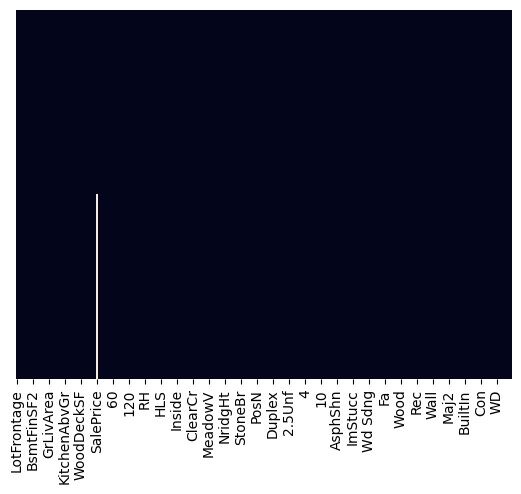

In [20]:
sns.heatmap(final_data.isnull(),yticklabels=False,cbar=False)

In [ ]:
def all_dummies(multcolumns):
    for fields in multcolumns:
        all_dummies = pd.get_dummies(final_data[fields], drop_first=True)
    
    return all_dummies

In [29]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
X_test  = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1)

/tmp/ipykernel_15117/2481492048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_saleprice.values, y=corr_with_saleprice.index, palette="coolwarm")


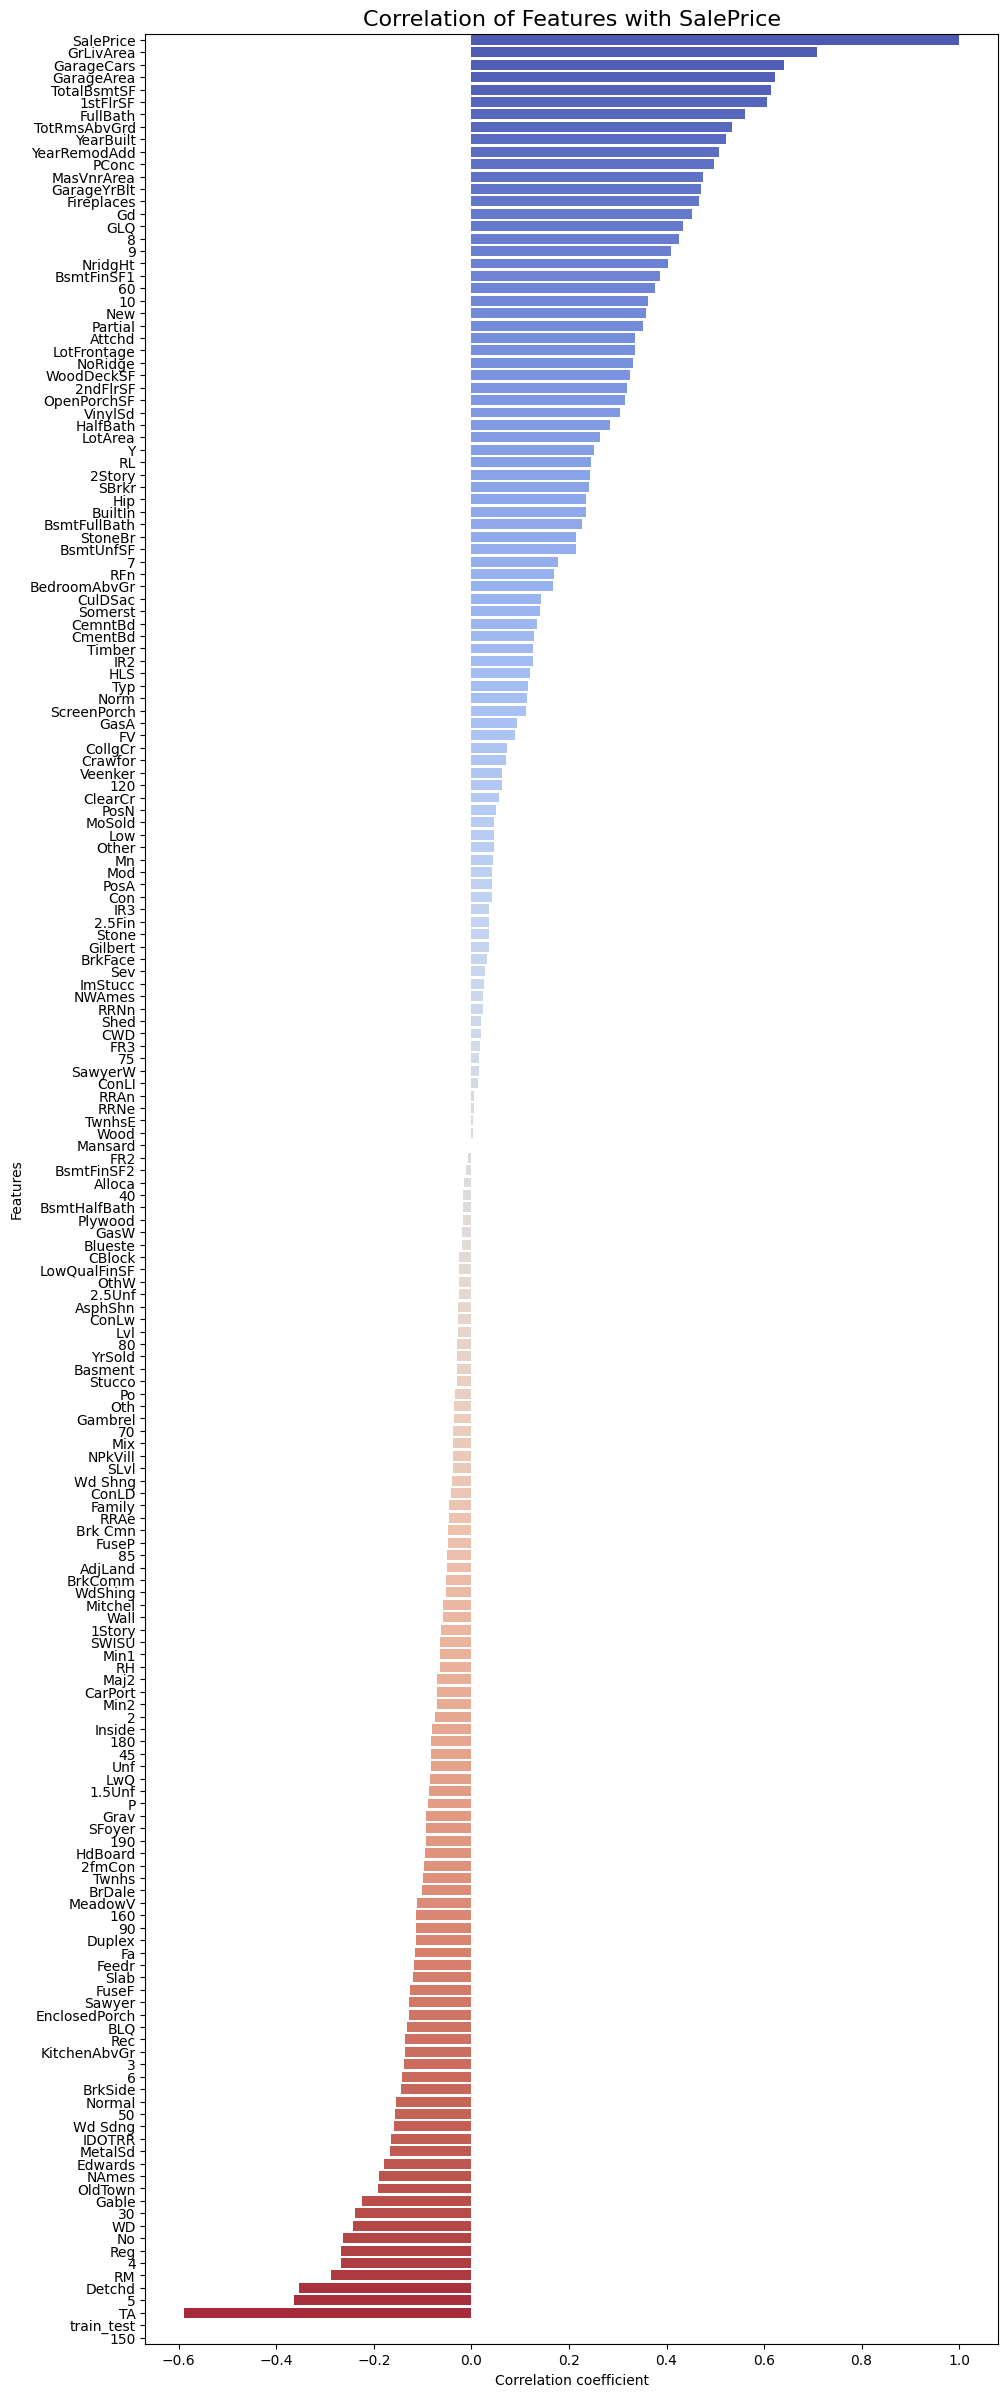

In [46]:
corr_with_saleprice = final_data.corr()['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(11, 30))
sns.barplot(x=corr_with_saleprice.values, y=corr_with_saleprice.index, palette="coolwarm")

plt.title('Correlation of Features with SalePrice', fontsize=16)
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

plt.show()


In [ ]:
corr_with_target = final_data.corr()['SalePrice'].abs()

relevant_features = corr_with_target[corr_with_target >= 0.2].index.tolist()

reduced_data = final_data[relevant_features]

print("Remaining columns:", reduced_data.columns.tolist())

Remaining columns: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 30, 60, 'RL', 'RM', 'Reg', 'NoRidge', 'NridgHt', 'StoneBr', '2Story', 4, 5, 8, 9, 10, 'Gable', 'Hip', 'VinylSd', 'Gd', 'TA', 'PConc', 'No', 'GLQ', 'Y', 'SBrkr', 'Attchd', 'BuiltIn', 'Detchd', 'New', 'WD', 'Partial']


/tmp/ipykernel_15117/2767728510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_saleprice.values, y=corr_with_saleprice.index, palette="coolwarm")


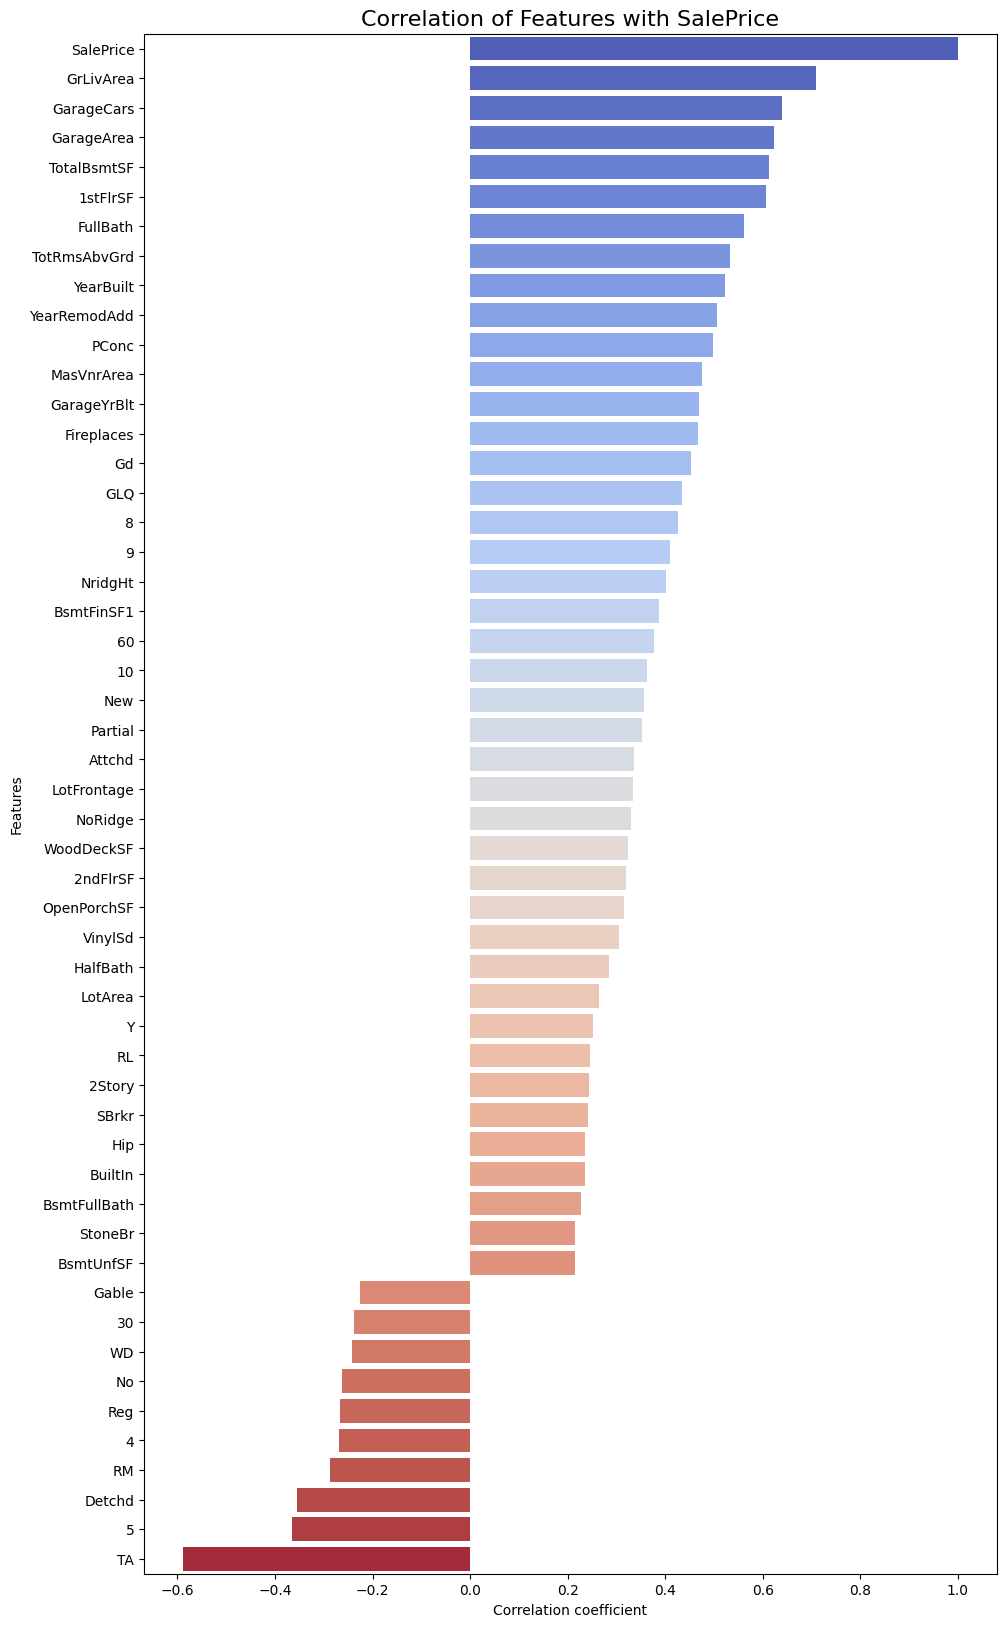

In [43]:
corr_with_saleprice = reduced_data.corr()['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(11, 20))
sns.barplot(x=corr_with_saleprice.values, y=corr_with_saleprice.index, palette="coolwarm")

plt.title('Correlation of Features with SalePrice', fontsize=16)
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

plt.show()


In [44]:
reduced_data.shape

(2919, 52)